In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
# Load the dataset
file_path = "kmeans_dataset_with_outliers.csv"
df = pd.read_csv(file_path)

In [26]:
# Extract data points (X, Y coordinates)
data = df[['X', 'Y']].values

In [27]:
# Perform K-means clustering with K=2 (modify K if needed)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(data)

C:\Users\pardh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
# Get the cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [29]:
# Print the final centroids and cluster assignments
print("Final Centroids (Cluster Centers):")
print(centroids)

print("\nCluster Assignments:")
for i, label in enumerate(labels):
    print(f"Point {i+1}: Cluster {label+1}")

Final Centroids (Cluster Centers):
[[  4.00531893   4.36387374]
 [-30.56466691  37.32771148]]

Cluster Assignments:
Point 1: Cluster 1
Point 2: Cluster 1
Point 3: Cluster 1
Point 4: Cluster 1
Point 5: Cluster 1
Point 6: Cluster 1
Point 7: Cluster 1
Point 8: Cluster 1
Point 9: Cluster 1
Point 10: Cluster 1
Point 11: Cluster 1
Point 12: Cluster 1
Point 13: Cluster 1
Point 14: Cluster 1
Point 15: Cluster 1
Point 16: Cluster 1
Point 17: Cluster 1
Point 18: Cluster 1
Point 19: Cluster 1
Point 20: Cluster 1
Point 21: Cluster 1
Point 22: Cluster 1
Point 23: Cluster 1
Point 24: Cluster 1
Point 25: Cluster 1
Point 26: Cluster 1
Point 27: Cluster 1
Point 28: Cluster 1
Point 29: Cluster 1
Point 30: Cluster 1
Point 31: Cluster 1
Point 32: Cluster 1
Point 33: Cluster 1
Point 34: Cluster 1
Point 35: Cluster 1
Point 36: Cluster 1
Point 37: Cluster 1
Point 38: Cluster 1
Point 39: Cluster 1
Point 40: Cluster 1
Point 41: Cluster 1
Point 42: Cluster 1
Point 43: Cluster 1
Point 44: Cluster 1
Point 45: Clu

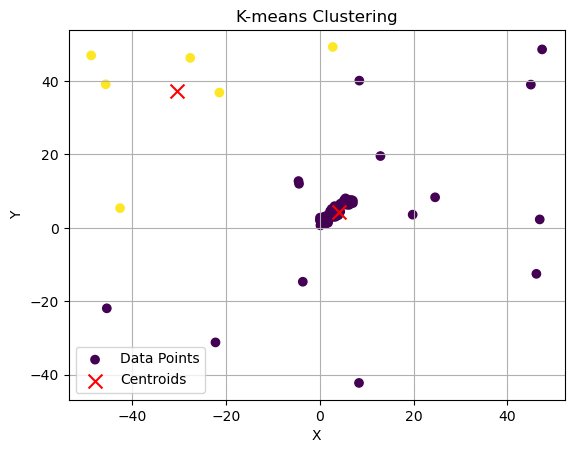

In [30]:
# Plot the data points and the centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [32]:
# Load the dataset
file_path = "kmeans_dataset_with_outliers.csv"
df = pd.read_csv(file_path)

In [33]:
# Extract data points (X, Y coordinates)
data = df[['X', 'Y']].values

In [34]:
# Perform the elbow method
inertia = []

# Test K values from 1 to 10 (you can adjust the range if needed)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

C:\Users\pardh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pardh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pardh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pardh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

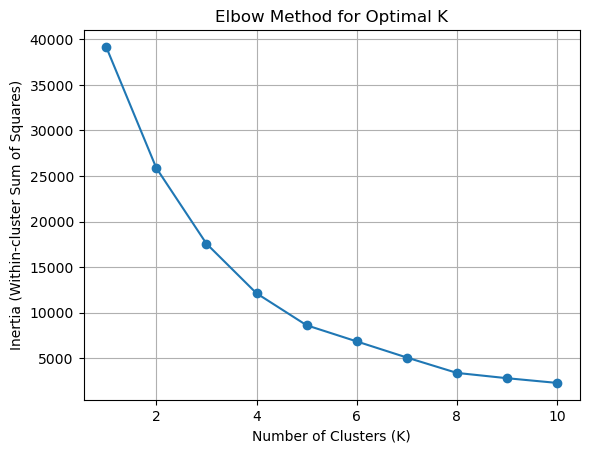

In [35]:
# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [37]:
# Load the dataset
df_marketing = pd.read_csv("marketing_campaign.csv", delimiter='\t')

In [38]:
# Step 1: Handle missing values (fill missing Income with median value)
df_marketing['Income'].fillna(df_marketing['Income'].median(), inplace=True)

In [39]:
# Step 2: Drop irrelevant columns
df_marketing.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], inplace=True)

In [40]:
# Step 3: Encode categorical variables
label_encoders = {}
for col in ['Education', 'Marital_Status']:
    le = LabelEncoder()
    df_marketing[col] = le.fit_transform(df_marketing[col])
    label_encoders[col] = le

In [41]:
# Step 4: Feature selection for clustering
selected_features = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]
df_selected = df_marketing[selected_features]

In [42]:
# Step 5: Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

In [43]:
# Step 6: Determine optimal K using Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\pardh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\pardh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\pardh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\pardh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

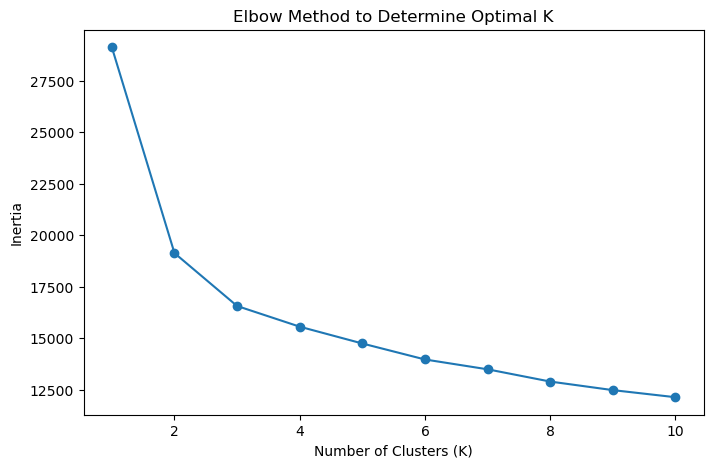

In [44]:
# Plot Elbow Method
def plot_elbow_method():
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertia, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method to Determine Optimal K')
    plt.show()
plot_elbow_method()

In [45]:
# Step 7: Apply K-Means Clustering with Optimal K (K=4 based on Elbow Method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
df_marketing['Cluster'] = kmeans.fit_predict(df_scaled)

C:\Users\pardh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


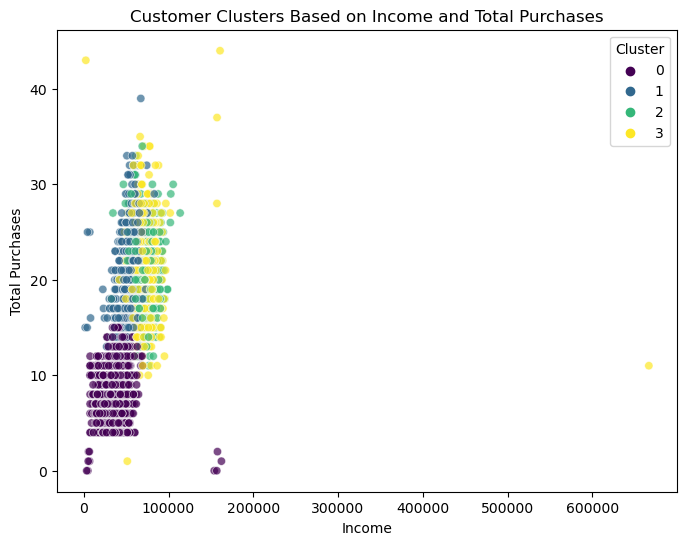

In [46]:
# Create a new feature for total purchases
df_marketing['TotalPurchases'] = df_marketing[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Step 8: Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_marketing['Income'], y=df_marketing['TotalPurchases'], hue=df_marketing['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('Total Purchases')
plt.title('Customer Clusters Based on Income and Total Purchases')
plt.legend(title="Cluster")
plt.show()